In [1]:
import sys
sys.path.append('./../')

import xarray as xr
import parcels
import numpy as np
import parcels 
from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish
import ikamoana.ikasimulation as ikasim
from ikamoana.utils import fieldToDataArray

# First we initialize and load fields

In [2]:
my_sim = ikasim.IkaSimulation()

> We can use both fielpaths, fields, dataarray, fieldset and dataset.

In [3]:
my_filepaths = {
    "U":"./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_u_L1_1979_2010.dym",
    "V":"./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_v_L1_1979_2010.dym",
}

my_fields = {
    "U":seapodymFieldConstructor("./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_u_L1_1979_2010.dym", "U"),
    "V":seapodymFieldConstructor("./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_v_L1_1979_2010.dym", "V"),
}

my_fieldset = parcels.FieldSet(
    U=parcels.Field.from_xarray(my_fields['U'], "U", {'time':'time', 'lat':'lat', 'lon':'lon'}),
    V=parcels.Field.from_xarray(my_fields['V'], "V", {'time':'time', 'lat':'lat', 'lon':'lon'}),
)

my_dataset = xr.Dataset(my_fields)

In [4]:
my_dataset

<xarray.Dataset>
Dimensions:  (time: 384, lat: 60, lon: 101)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-15 1979-02-14 ... 2010-12-16
  * lat      (lat) float32 64.5 62.5 60.5 58.5 56.5 ... -47.5 -49.5 -51.5 -53.5
  * lon      (lon) float32 89.5 91.5 93.5 95.5 97.5 ... 283.5 285.5 287.5 289.5
Data variables:
    U        (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.01904 0.0 0.0
    V        (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0006502 0.0 0.0

In [5]:
my_sim.loadFields(fields=my_dataset, inplace=False)

In [6]:
my_sim.ocean.landmask

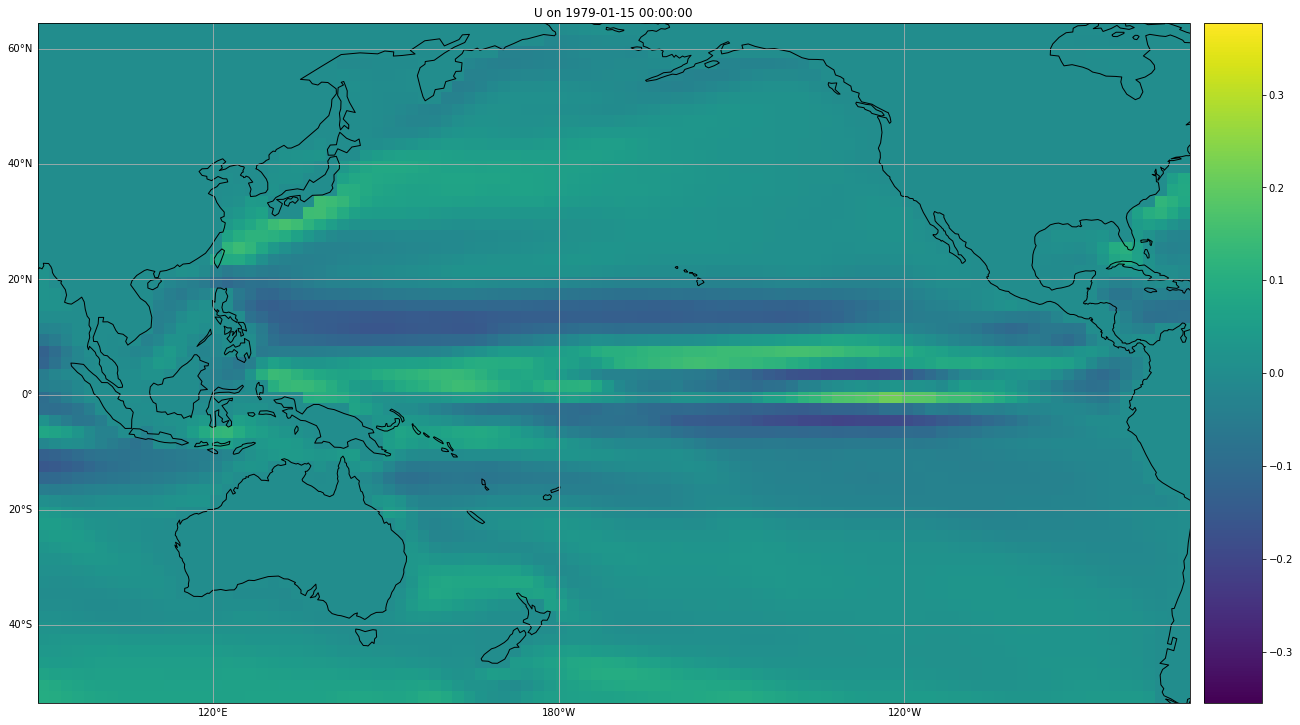

In [7]:
my_sim.ocean.U.show()

# Then we initialize ParticleSet (using list of latitudes and longitudes)

In [8]:
my_sim.initializeParticleSet(
    particles_longitude=[150],
    particles_latitude=[10],
    particles_class=IkaFish,
    particles_starting_time=np.datetime64('1979-01-15'),
    particles_variables={"age":[0],
                         "age_class":[0]}
)

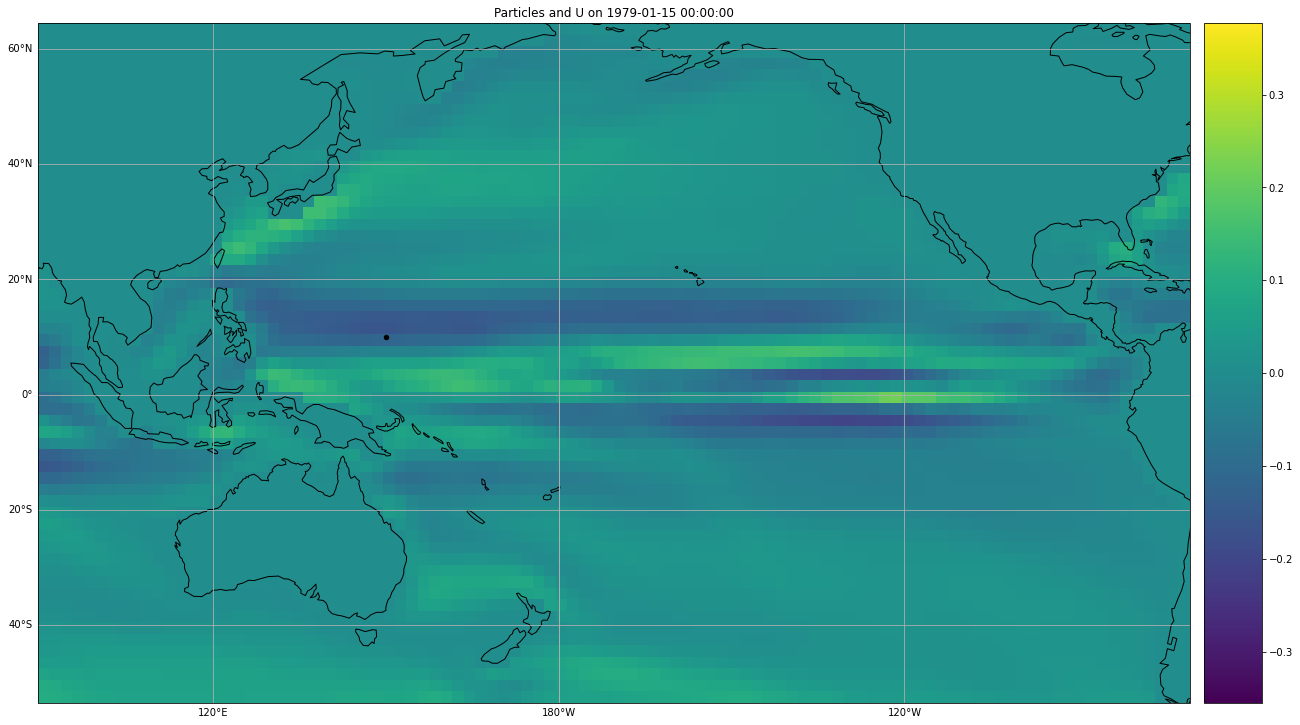

In [9]:
my_sim.fish.show(field=my_sim.ocean.U)

# And finally kernel(s) can be executed

In [10]:
my_sim.fish

P[0](lon=150.000000, lat=10.000000, depth=0.000000, age_class=0.000000, time=0.000000)

In [11]:
my_sim.runKernels(
    {"AdvectionRK4":parcels.AdvectionRK4},
    duration_time= 30 * (24*60*60),
    #end_time=np.datetime64('1980-02-15'),
    delta_time=24*60*60,
    output_delta_time=24*60*60,
)

INFO: Compiled ArrayIkaFishAdvectionRK4 ==> /tmp/parcels-1000/lib69e0dcf394fa6854463cfa4c28fc04f6_0.so


In [12]:
my_sim.fish

P[0](lon=146.271255, lat=10.478136, depth=0.000000, age_class=0.000000, time=2592000.000000)

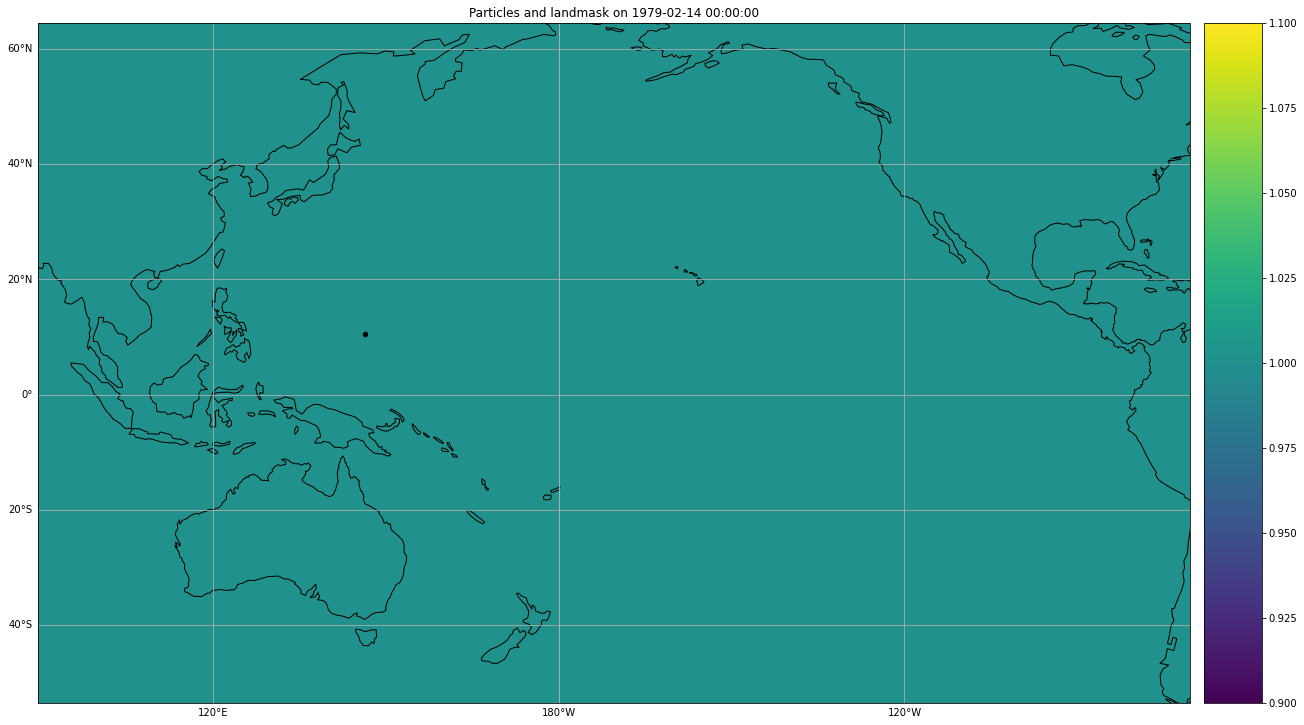

In [13]:
my_sim.fish.show(field=my_sim.ocean.landmask)

---